<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/GW_pycbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install pycbc
import numpy as np
import pycbc
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
from pycbc.waveform import td_approximants, fd_approximants, get_td_waveform
from pycbc.detector import Detector
import cv2
from scipy.interpolate import interp1d
import pywt


In [19]:
print(td_approximants())


['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBN

In [20]:
print(fd_approximants())

['EccentricFD', 'TaylorF2', 'TaylorF2Ecc', 'TaylorF2NLTides', 'TaylorF2RedSpin', 'TaylorF2RedSpinTidal', 'SpinTaylorF2', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_DoubleSpin_HI', 'Lackey_Tidal_2013_SEOBNRv2_ROM', 'SEOBNRv4_ROM', 'SEOBNRv4HM_ROM', 'SEOBNRv4_ROM_NRTidal', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'SEOBNRv4T_surrogate', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidal', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomP', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'SpinTaylorT4Fourier', 'SpinTaylorT5Fourier', 'NRSur4d2s', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'SpinTaylorF2_SWAPPER', 'TaylorF2NL', 'PreTaylorF2', 'multiband', 'TaylorF2_INTERP', 'SpinTaylorT5', 'SEOBNRv1_ROM_EffectiveSpin_INTERP', 'SEOBNRv1_ROM_DoubleSp

In [21]:
gwlist = ['SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv2T', 'SEOBNRv4T', ]
gwlist = ['SEOBNRv2', 'SEOBNRv4' ]


SEOBNRv4
(3, 2371)


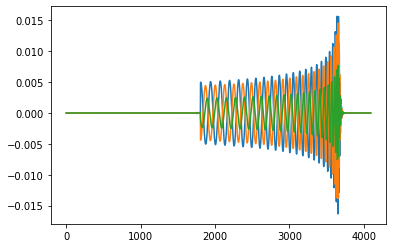

(152, 4096, 3)
0.0 0.030002050351358767


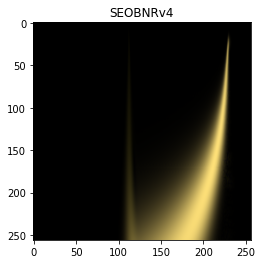

SEOBNRv2
(3, 2706)


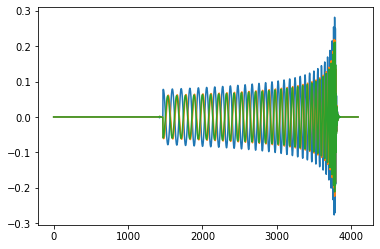

(152, 4096, 3)
0.0 0.37827697494936485


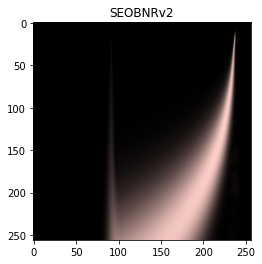

SEOBNRv4
(3, 2391)


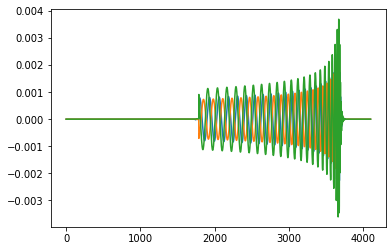

(152, 4096, 3)
0.0 0.00679853174585014


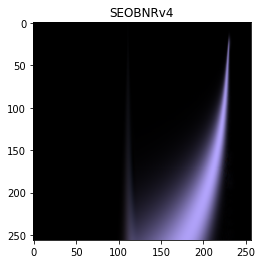

SEOBNRv2
(3, 1323)


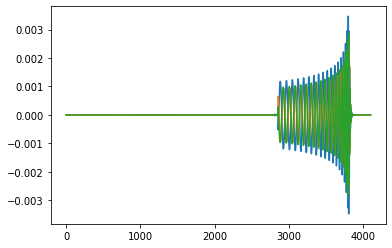

(152, 4096, 3)
0.0 0.005504576665879221


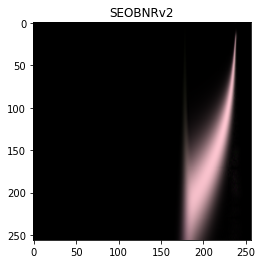

SEOBNRv2
(3, 1114)


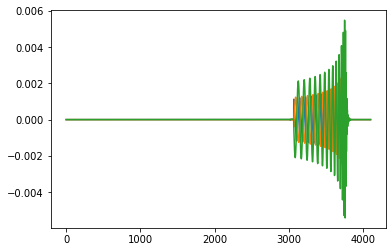

(152, 4096, 3)
0.0 0.00947243836192359


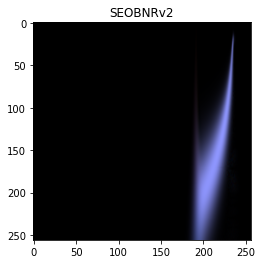

SEOBNRv2
(3, 2086)


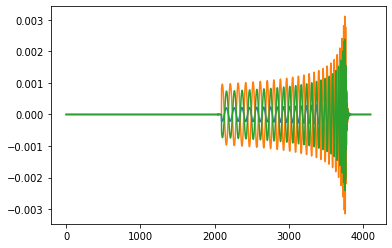

(152, 4096, 3)
0.0 0.005236736468247913


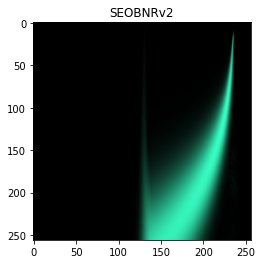

SEOBNRv4
(3, 1415)


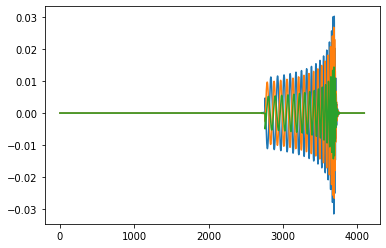

(152, 4096, 3)
0.0 0.05355345321299379


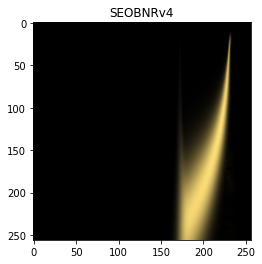

SEOBNRv2
(3, 5385)


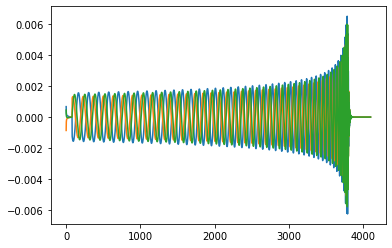

(152, 4096, 3)
5.517321348697871e-22 0.010117276428197746


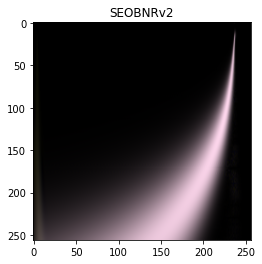

SEOBNRv2
(3, 1316)


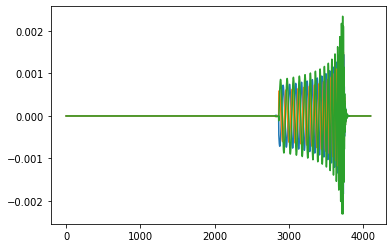

(152, 4096, 3)
0.0 0.0040836989450619985


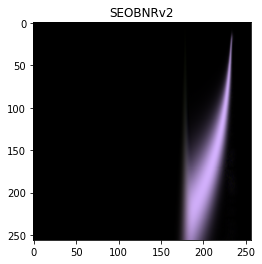

SEOBNRv4
(3, 1290)


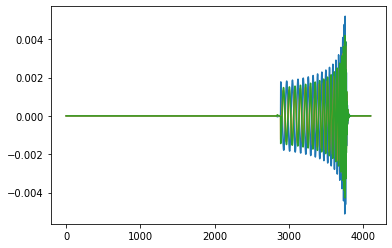

(152, 4096, 3)
0.0 0.008199502526795785


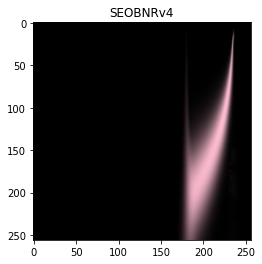

SEOBNRv2
(3, 1531)


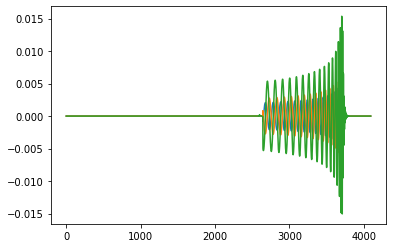

(152, 4096, 3)
0.0 0.02753102935702596


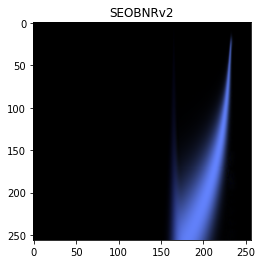

SEOBNRv4
(3, 1123)


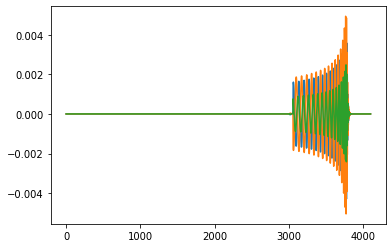

(152, 4096, 3)
0.0 0.00807719488163263


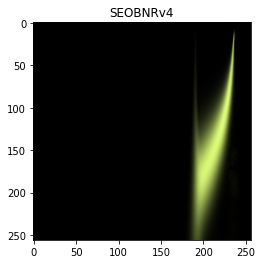

SEOBNRv2
(3, 1313)


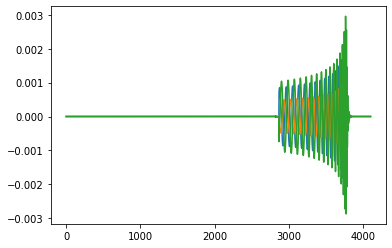

(152, 4096, 3)
0.0 0.004966413823463076


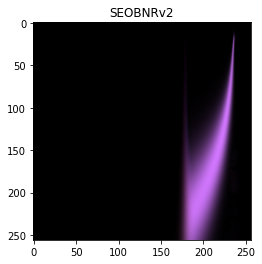

SEOBNRv2
(3, 867)


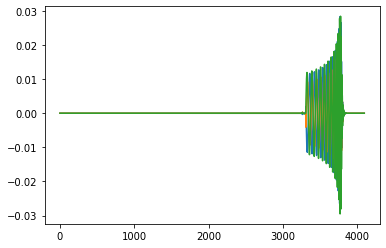

(152, 4096, 3)
0.0 0.04661312295789474


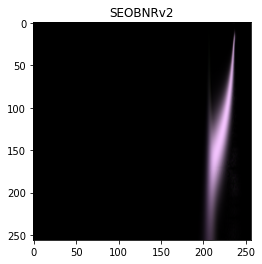

SEOBNRv2
(3, 1120)


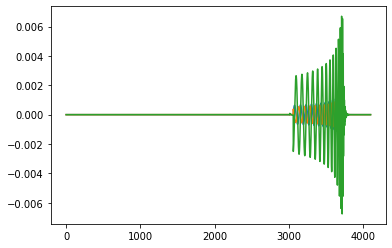

(152, 4096, 3)
0.0 0.011747395160334583


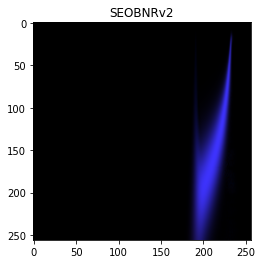

SEOBNRv4
(3, 4714)


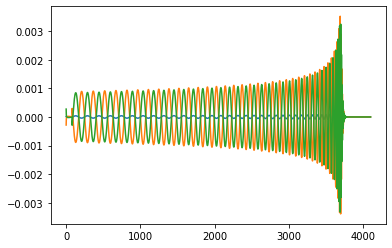

(152, 4096, 3)
0.0 0.006105788990428104


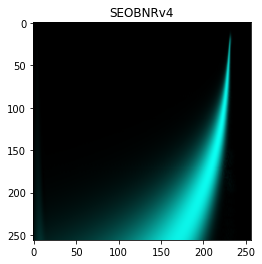

SEOBNRv4
(3, 1638)


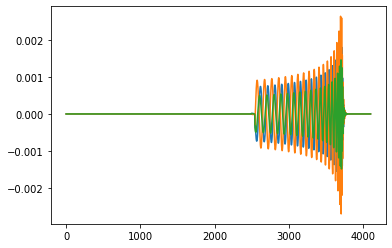

(152, 4096, 3)
0.0 0.004738972618155183


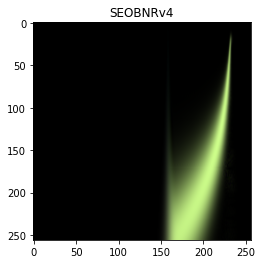

SEOBNRv2
(3, 1041)


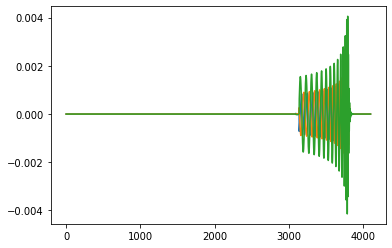

(152, 4096, 3)
0.0 0.006834961332805941


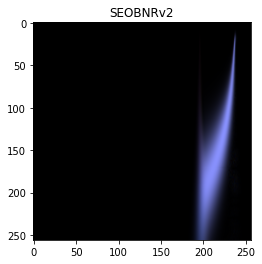

SEOBNRv2
(3, 1089)


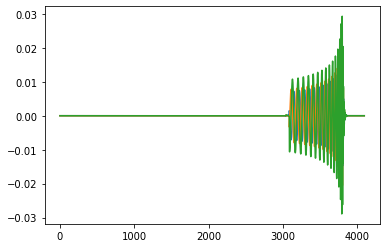

(152, 4096, 3)
0.0 0.04609320532327102


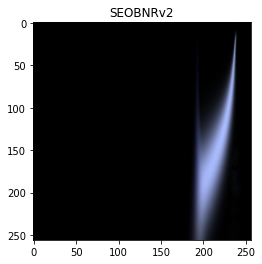

SEOBNRv4
(3, 3526)


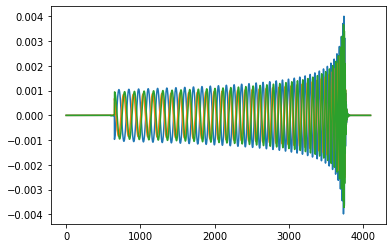

(152, 4096, 3)
0.0 0.006603212861417251


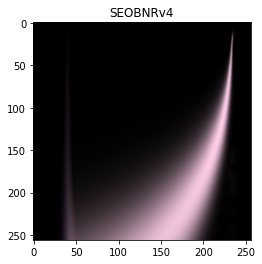

SEOBNRv2
(3, 1940)


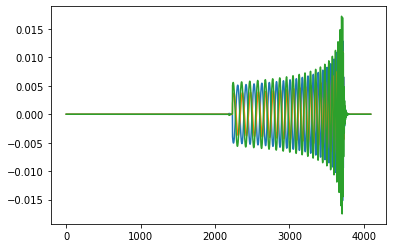

(152, 4096, 3)
0.0 0.030388134886968843


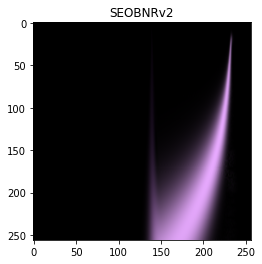

SEOBNRv4
(3, 2544)


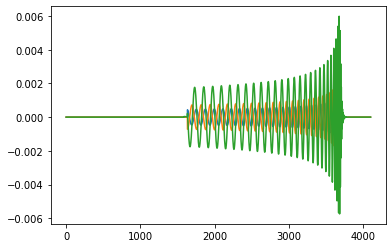

(152, 4096, 3)
0.0 0.010460112295685721


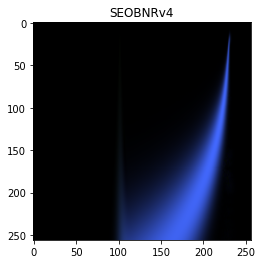

SEOBNRv2
(3, 4807)


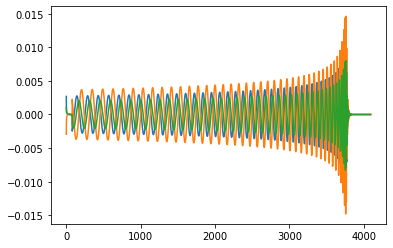

(152, 4096, 3)
1.5177425487876734e-21 0.023942702484005936


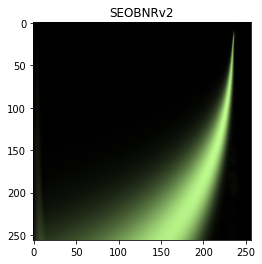

SEOBNRv4
(3, 1319)


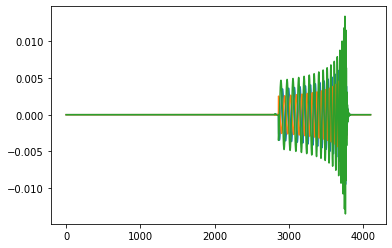

(152, 4096, 3)
0.0 0.021771085307731763


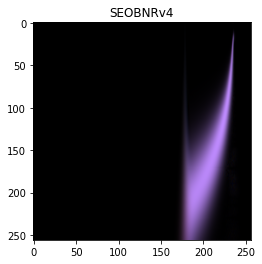

SEOBNRv2
(3, 1024)


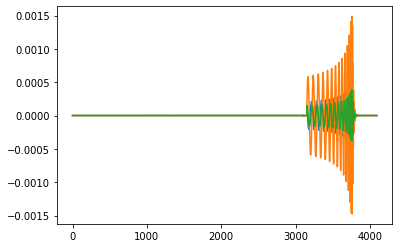

(152, 4096, 3)
0.0 0.0024757774338370676


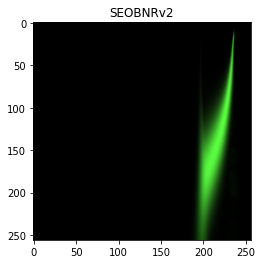

SEOBNRv4
(3, 1454)


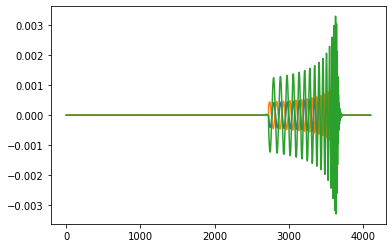

(152, 4096, 3)
0.0 0.0061408123712677655


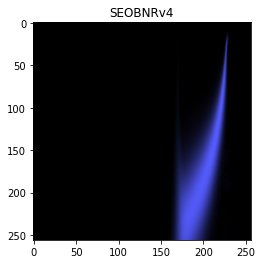

SEOBNRv4
(3, 2322)


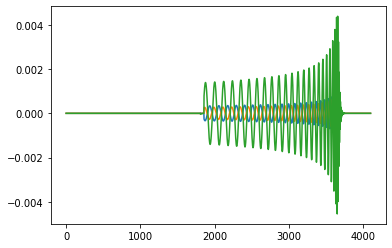

(152, 4096, 3)
0.0 0.008212829686054687


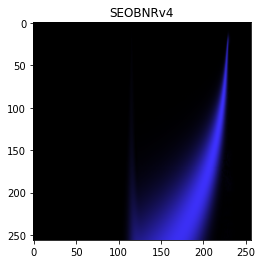

SEOBNRv2
(3, 1690)


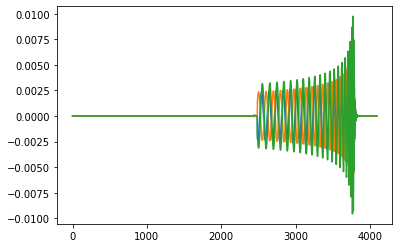

(152, 4096, 3)
0.0 0.01624270443032639


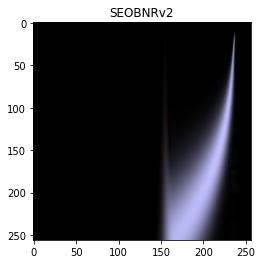

SEOBNRv2
(3, 791)


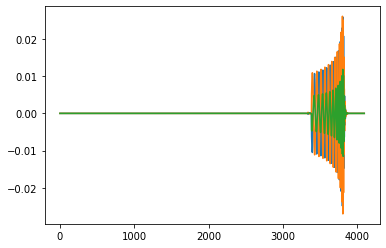

(152, 4096, 3)
0.0 0.04113274775445297


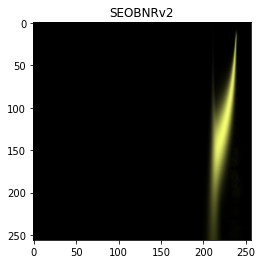

SEOBNRv2
(3, 1935)


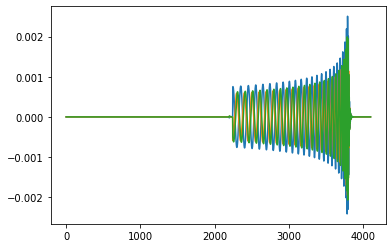

(152, 4096, 3)
0.0 0.004049428970380724


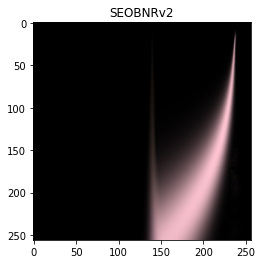

SEOBNRv4
(3, 1008)


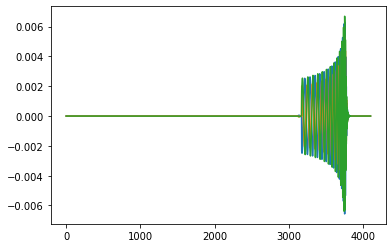

(152, 4096, 3)
0.0 0.010875222560349451


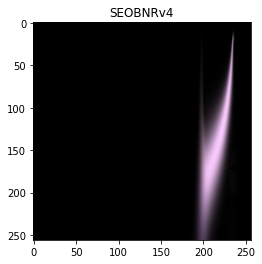

SEOBNRv2
(3, 1086)


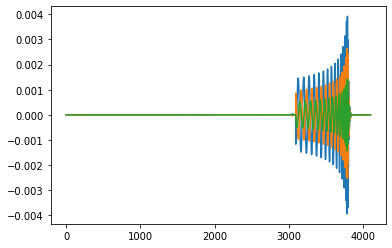

(152, 4096, 3)
0.0 0.006353952852358104


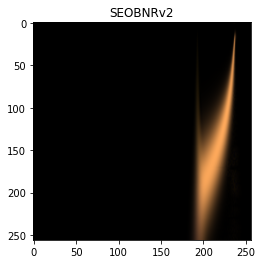

SEOBNRv4
(3, 1045)


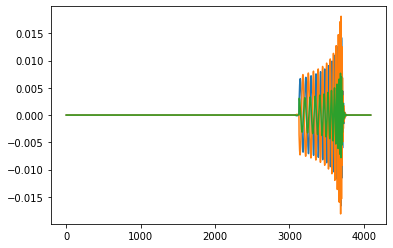

(152, 4096, 3)
0.0 0.03136412625548174


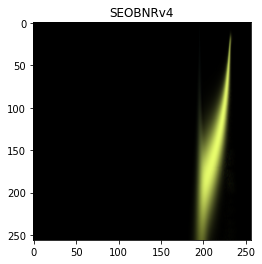

SEOBNRv2
(3, 1373)


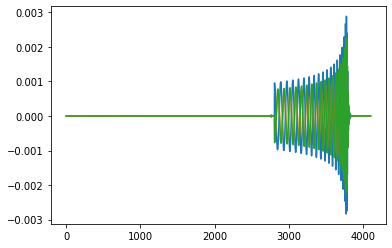

(152, 4096, 3)
0.0 0.004597267244437994


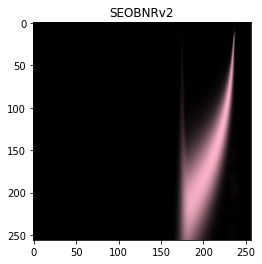

SEOBNRv4
(3, 1131)


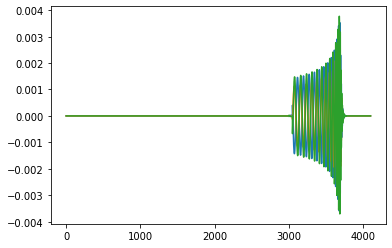

(152, 4096, 3)
0.0 0.0067526351670251184


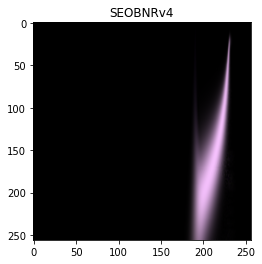

SEOBNRv2
(3, 2379)


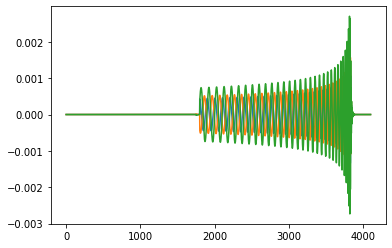

(152, 4096, 3)
0.0 0.0040531380417184164


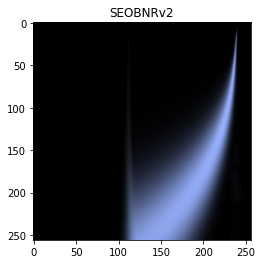

SEOBNRv2
(3, 2045)


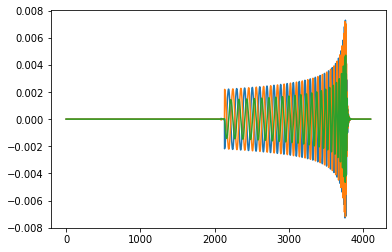

(152, 4096, 3)
0.0 0.01203128207139161


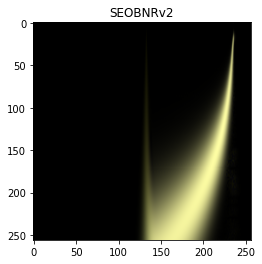

SEOBNRv4
(3, 1307)


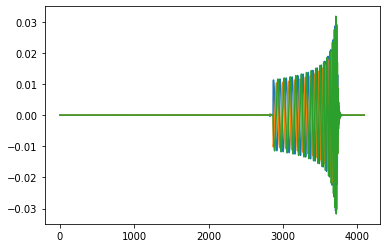

(152, 4096, 3)
0.0 0.053266700805971526


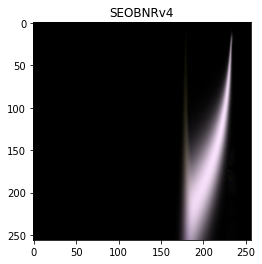

SEOBNRv4
(3, 1066)


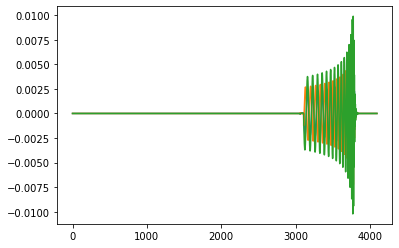

(152, 4096, 3)
0.0 0.015781602596719936


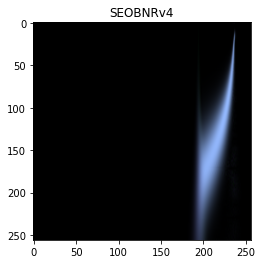

SEOBNRv4
(3, 1363)


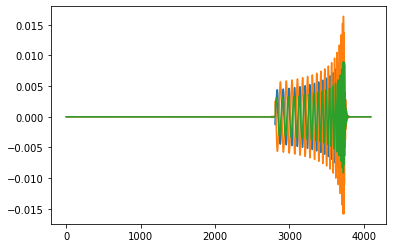

(152, 4096, 3)
0.0 0.026175349016970047


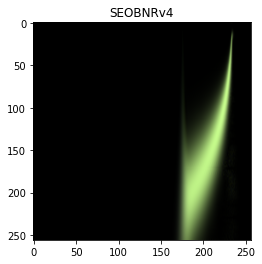

SEOBNRv4
(3, 1179)


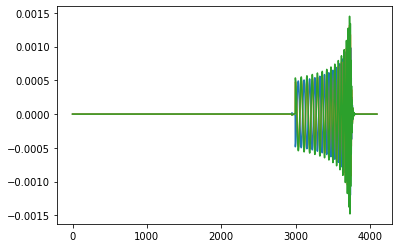

(152, 4096, 3)
0.0 0.002442717411910906


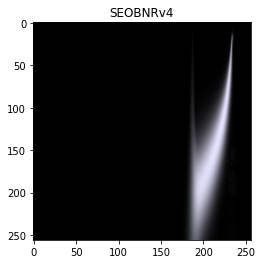

SEOBNRv4
(3, 1039)


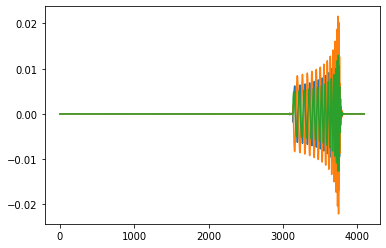

(152, 4096, 3)
0.0 0.034869631957584385


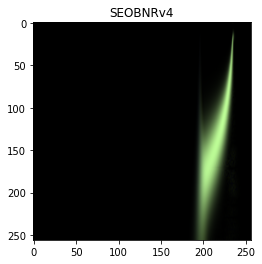

SEOBNRv2
(3, 943)


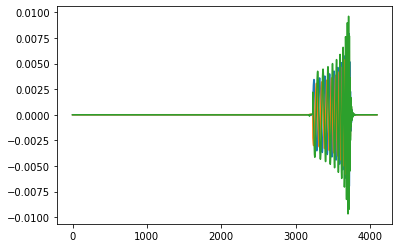

(152, 4096, 3)
0.0 0.017564327714208527


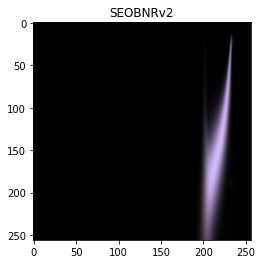

SEOBNRv4
(3, 883)


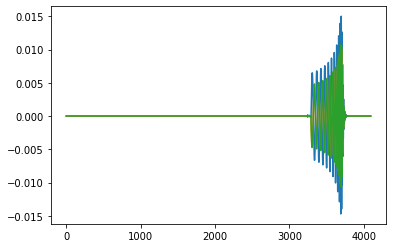

(152, 4096, 3)
0.0 0.02482302380904507


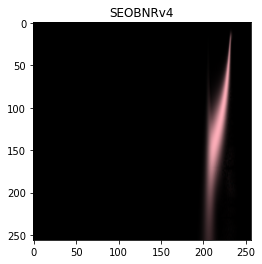

SEOBNRv2
(3, 905)


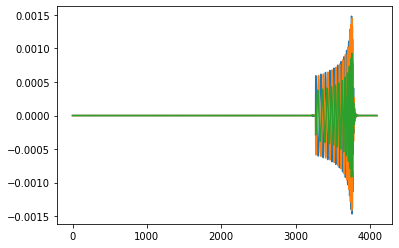

(152, 4096, 3)
0.0 0.0024180866737162987


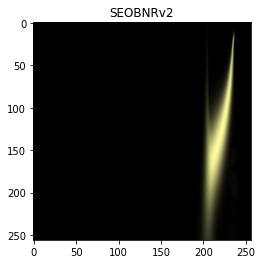

SEOBNRv2
(3, 1933)


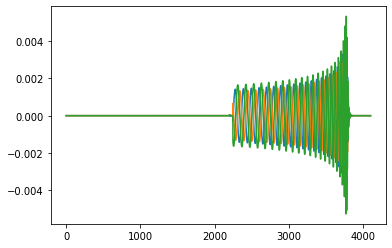

(152, 4096, 3)
0.0 0.008967002102310846


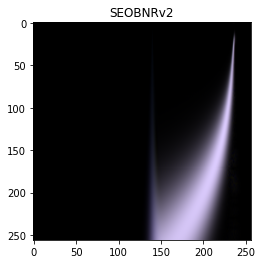

SEOBNRv2
(3, 1005)


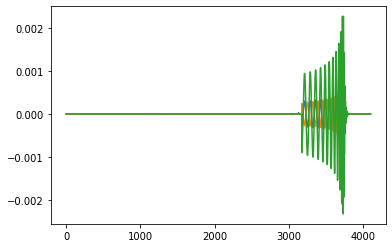

(152, 4096, 3)
0.0 0.004076073794731292


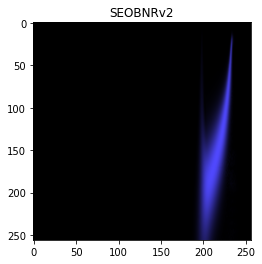

SEOBNRv4
(3, 1347)


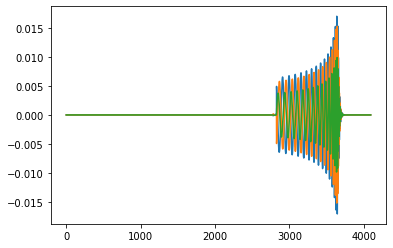

(152, 4096, 3)
0.0 0.030655576253173857


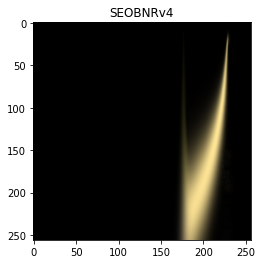

SEOBNRv2
(3, 4065)


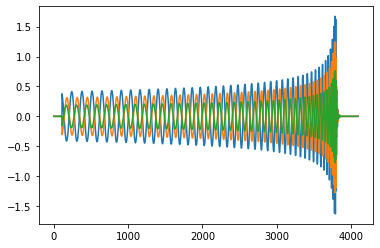

(152, 4096, 3)
2.1578678807097267e-19 1.2974521987010543


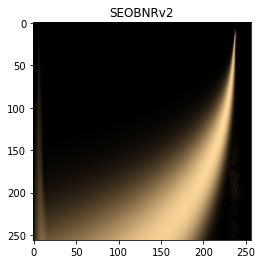

SEOBNRv2
(3, 760)


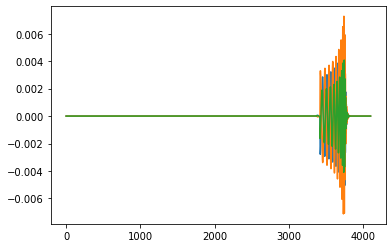

(152, 4096, 3)
0.0 0.012388765551315599


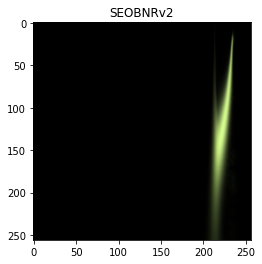

SEOBNRv4
(3, 2289)


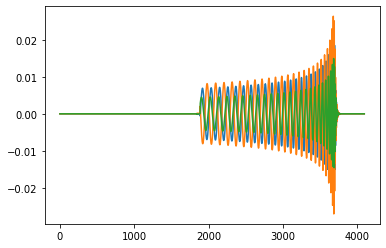

(152, 4096, 3)
0.0 0.045531116617460204


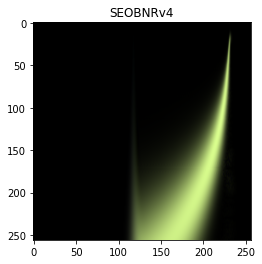

SEOBNRv4
(3, 847)


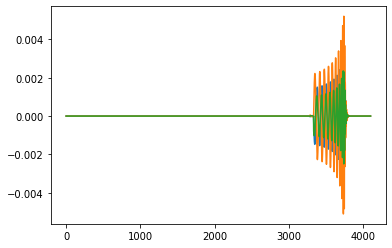

(152, 4096, 3)
0.0 0.008831367338711453


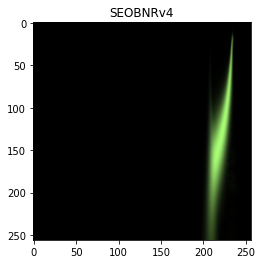

SEOBNRv2
(3, 805)


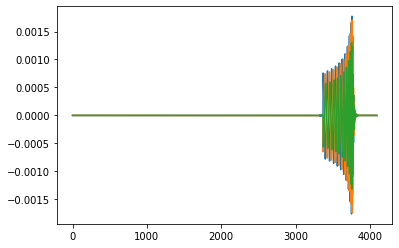

(152, 4096, 3)
0.0 0.002924436991643876


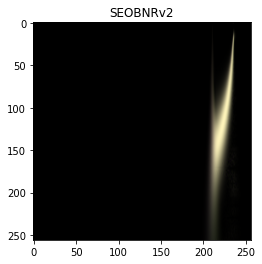

SEOBNRv4
(3, 1656)


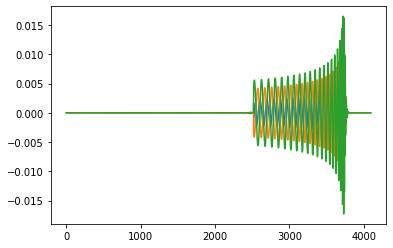

(152, 4096, 3)
0.0 0.028247303378680262


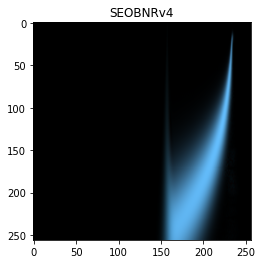

SEOBNRv2
(3, 1125)


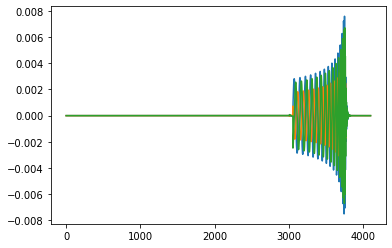

(152, 4096, 3)
0.0 0.012474760109908759


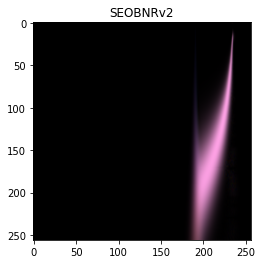

SEOBNRv4
(3, 1354)


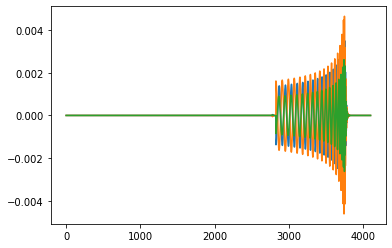

(152, 4096, 3)
0.0 0.007719696199779261


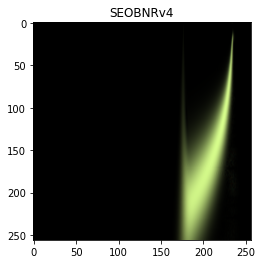

SEOBNRv4
(3, 1469)


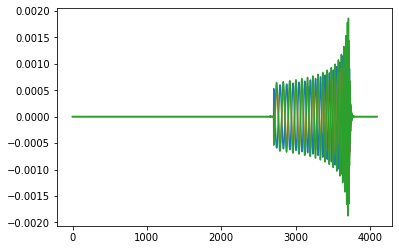

(152, 4096, 3)
0.0 0.0031762163962943983


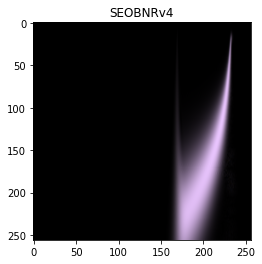

SEOBNRv2
(3, 1141)


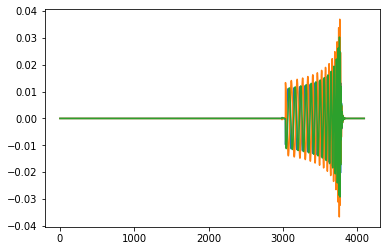

(152, 4096, 3)
0.0 0.060736910362558315


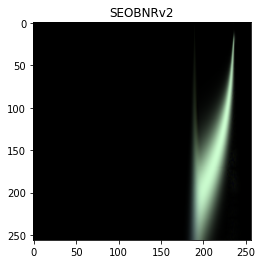

SEOBNRv4
(3, 1449)


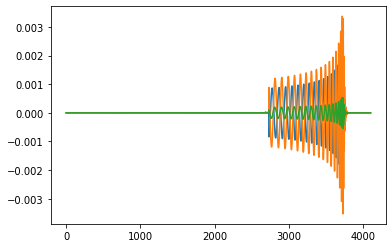

(152, 4096, 3)
0.0 0.005890870701924243


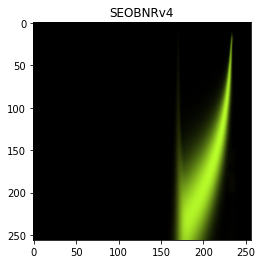

SEOBNRv4
(3, 1822)


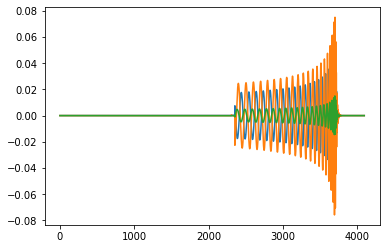

(152, 4096, 3)
0.0 0.12329310230767249


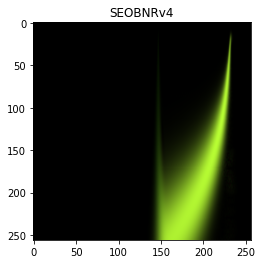

SEOBNRv2
(3, 1860)


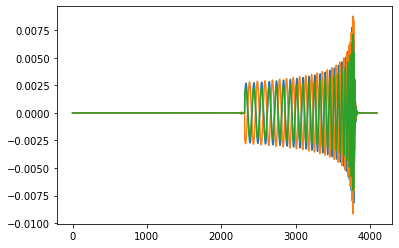

(152, 4096, 3)
0.0 0.01499535216768618


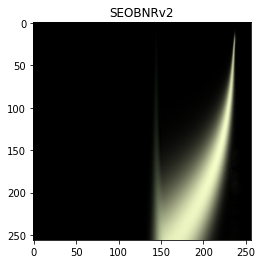

SEOBNRv2
(3, 2236)


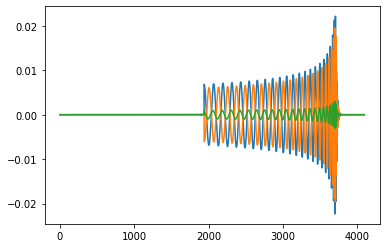

(152, 4096, 3)
0.0 0.03980723589409459


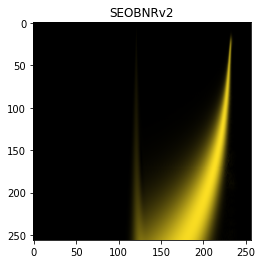

SEOBNRv2
(3, 1070)


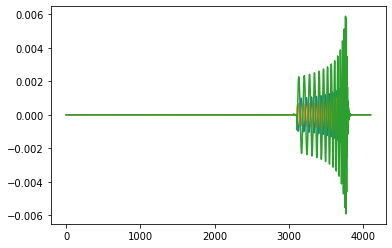

(152, 4096, 3)
0.0 0.009780258944020135


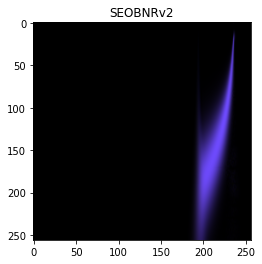

SEOBNRv4
(3, 821)


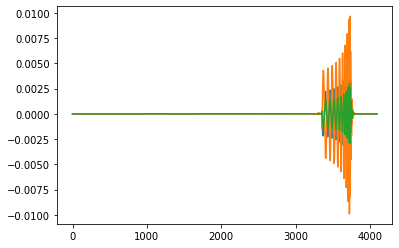

(152, 4096, 3)
0.0 0.016500128931651276


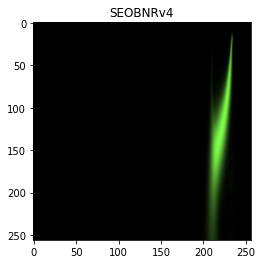

SEOBNRv2
(3, 889)


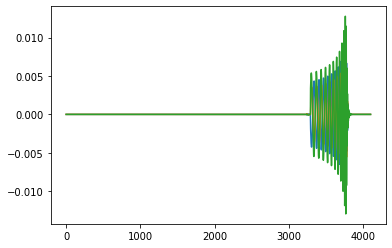

(152, 4096, 3)
0.0 0.021721056274791196


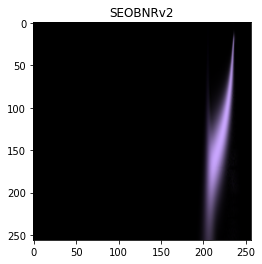

SEOBNRv4
(3, 830)


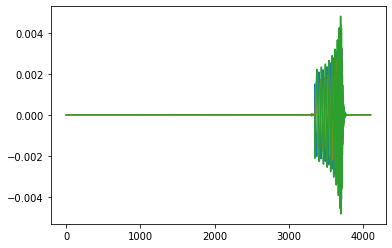

(152, 4096, 3)
0.0 0.008296802037165473


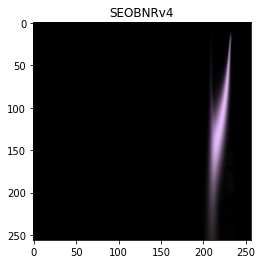

SEOBNRv2
(3, 1430)


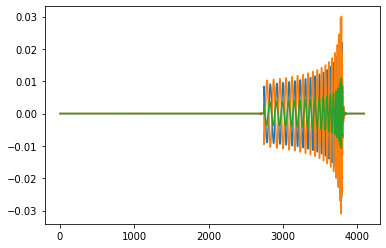

(152, 4096, 3)
0.0 0.048702862450073214


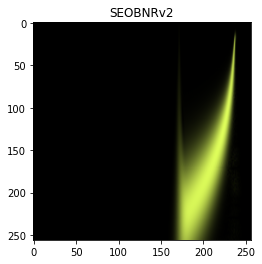

SEOBNRv4
(3, 3113)


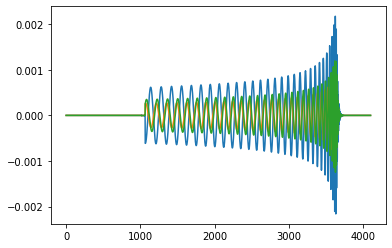

(152, 4096, 3)
0.0 0.003990990863545746


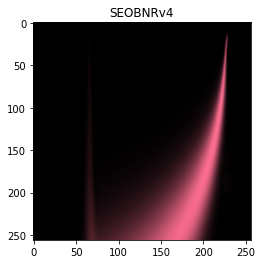

SEOBNRv2
(3, 1759)


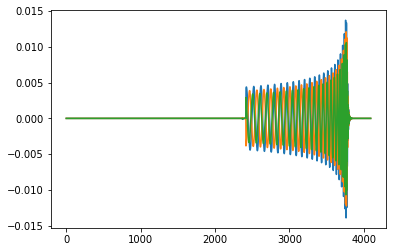

(152, 4096, 3)
0.0 0.02249262758795742


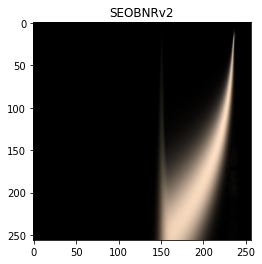

SEOBNRv2
(3, 714)


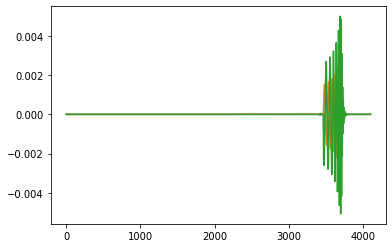

(152, 4096, 3)
0.0 0.009116714850758663


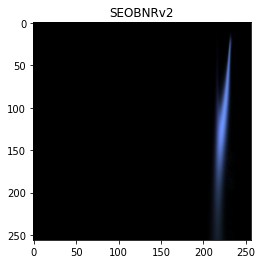

SEOBNRv4
(3, 1229)


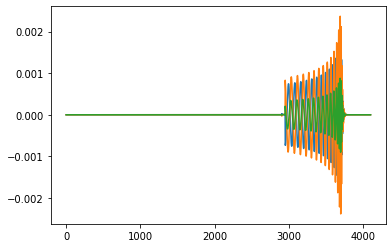

(152, 4096, 3)
0.0 0.004187393366773956


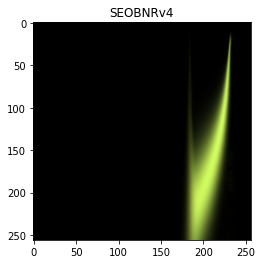

SEOBNRv2
(3, 2768)


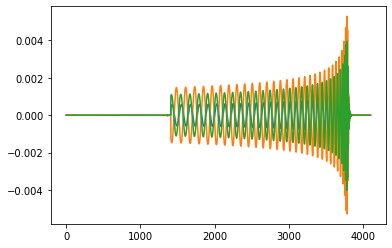

(152, 4096, 3)
0.0 0.008759979581771268


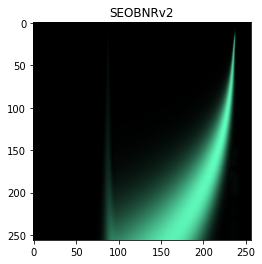

SEOBNRv2
(3, 1052)


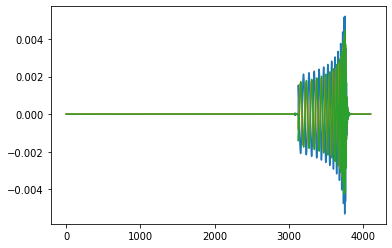

(152, 4096, 3)
0.0 0.00910388446555264


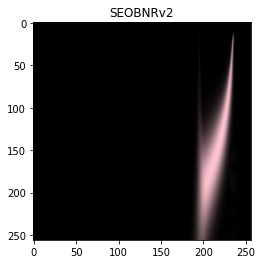

SEOBNRv4
(3, 3446)


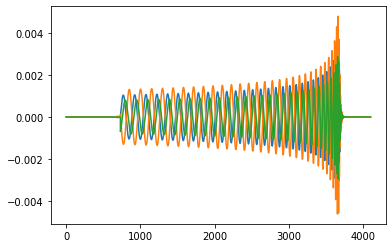

(152, 4096, 3)
0.0 0.008744934886067582


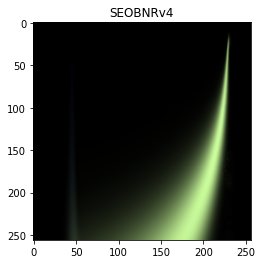

SEOBNRv2
(3, 875)


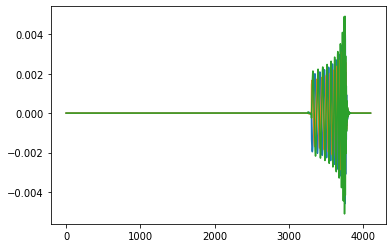

(152, 4096, 3)
0.0 0.008657971180030052


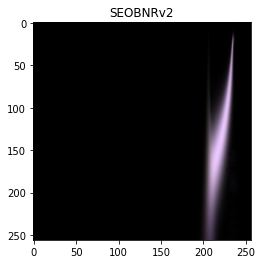

SEOBNRv2
(3, 3340)


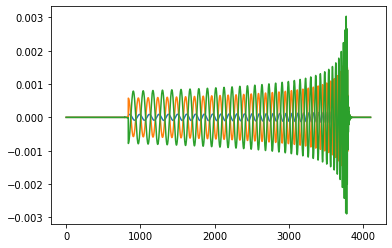

(152, 4096, 3)
0.0 0.004897270184282254


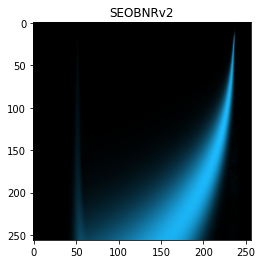

SEOBNRv2
(3, 2066)


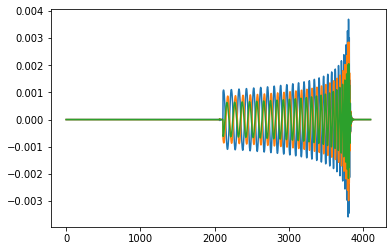

(152, 4096, 3)
0.0 0.00588573489114825


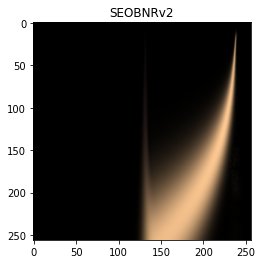

SEOBNRv2
(3, 1308)


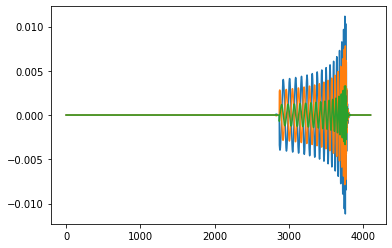

(152, 4096, 3)
0.0 0.018702737746003048


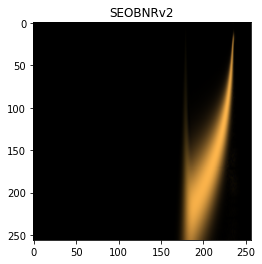

SEOBNRv2
(3, 1336)


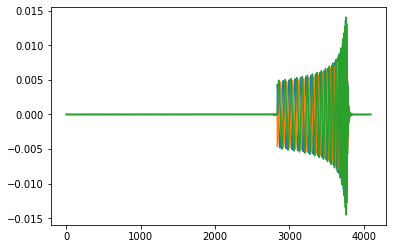

(152, 4096, 3)
0.0 0.022892324238656135


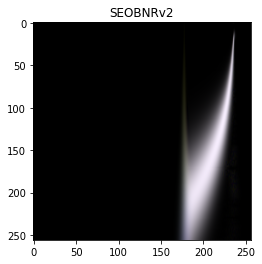

SEOBNRv4
(3, 3921)


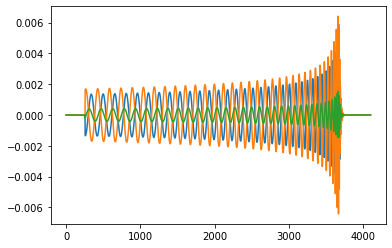

(152, 4096, 3)
0.0 0.011689792325270523


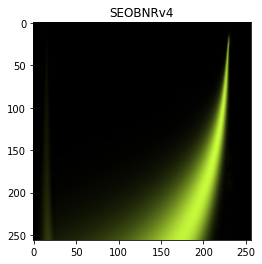

SEOBNRv2
(3, 853)


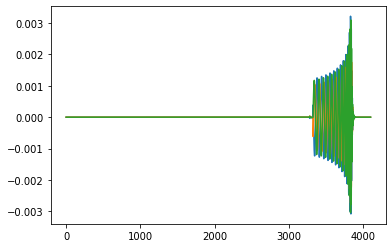

(152, 4096, 3)
0.0 0.004909856508801849


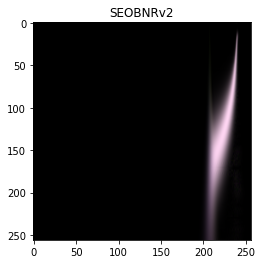

SEOBNRv2
(3, 1707)


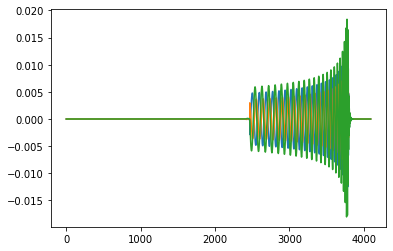

(152, 4096, 3)
0.0 0.02934553471370847


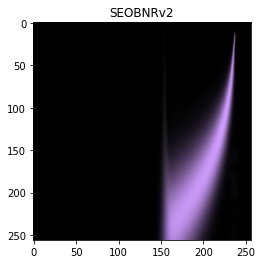

SEOBNRv2
(3, 817)


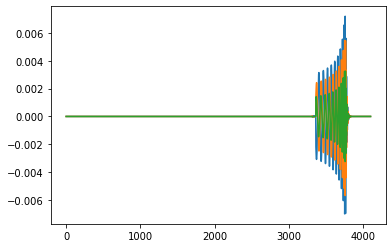

(152, 4096, 3)
0.0 0.011970072580634036


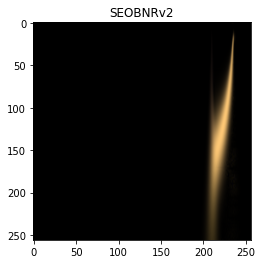

SEOBNRv4
(3, 3266)


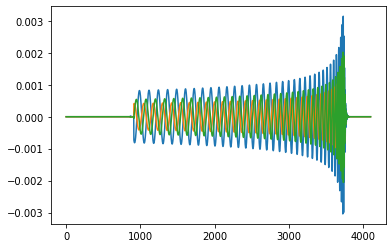

(152, 4096, 3)
0.0 0.0050985084745045475


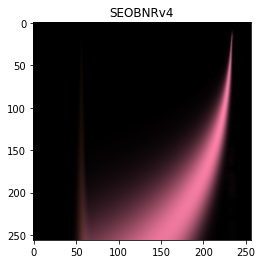

SEOBNRv4
(3, 6452)


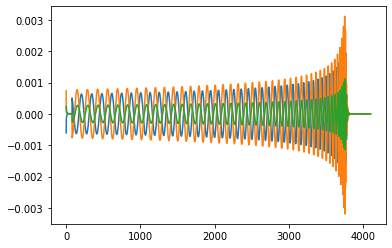

(152, 4096, 3)
2.8711093368416526e-22 0.005059253367229622


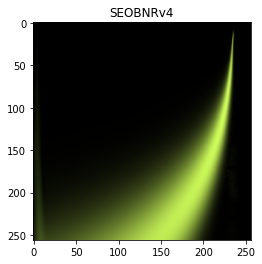

SEOBNRv2
(3, 1303)


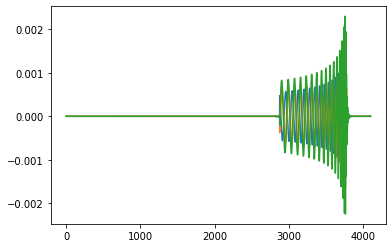

(152, 4096, 3)
0.0 0.003929658942439269


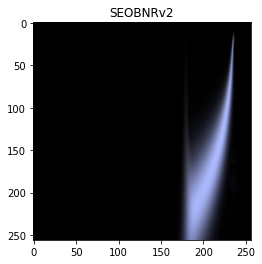

SEOBNRv2
(3, 802)


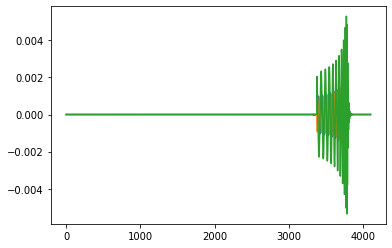

(152, 4096, 3)
0.0 0.008624046830060959


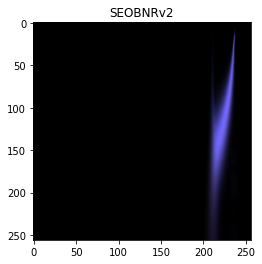

SEOBNRv4
(3, 3708)


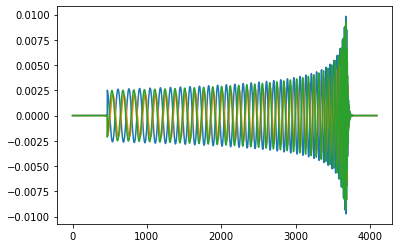

(152, 4096, 3)
0.0 0.017217598731738518


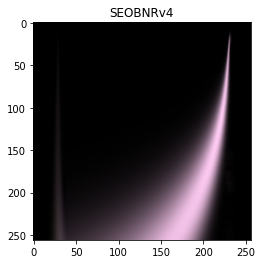

SEOBNRv2
(3, 3137)


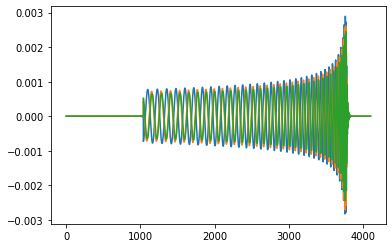

(152, 4096, 3)
0.0 0.0047188251286925395


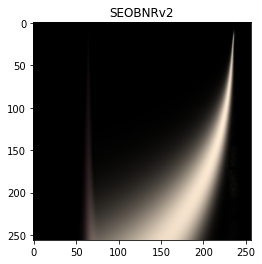

SEOBNRv4
(3, 1370)


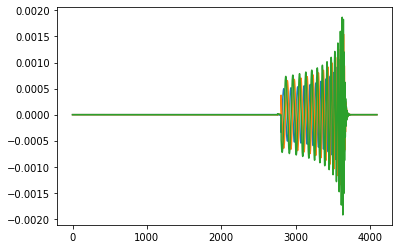

(152, 4096, 3)
0.0 0.003628961625566542


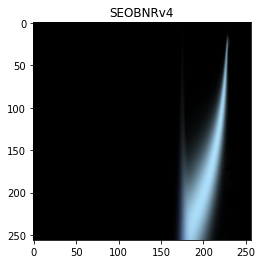

SEOBNRv2
(3, 842)


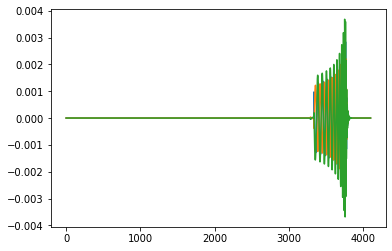

(152, 4096, 3)
0.0 0.006095502058220992


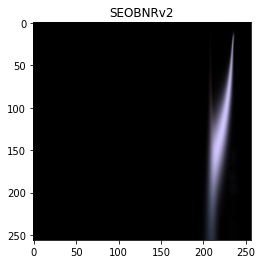

SEOBNRv4
(3, 1209)


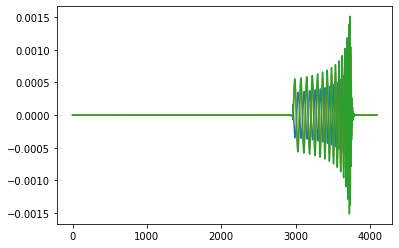

(152, 4096, 3)
0.0 0.002565139101254361


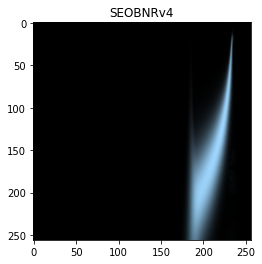

SEOBNRv2
(3, 2166)


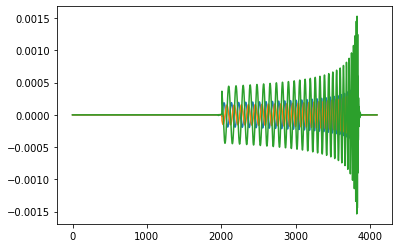

(152, 4096, 3)
0.0 0.0023419469095028833


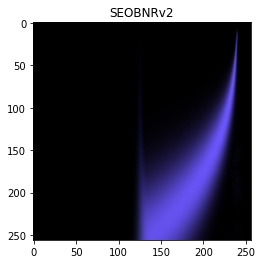

SEOBNRv2
(3, 876)


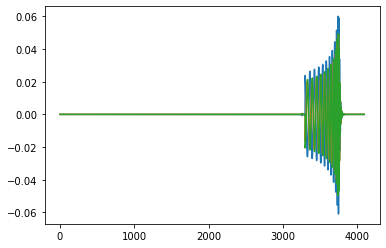

(152, 4096, 3)
0.0 0.09784848562197958


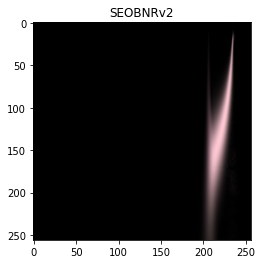

SEOBNRv4
(3, 4516)


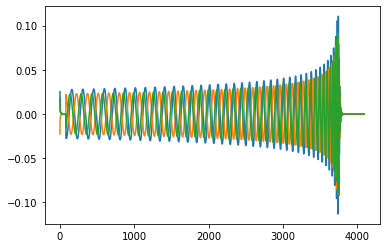

(152, 4096, 3)
0.0 0.17078923472416924


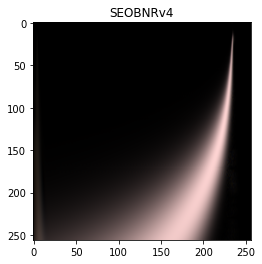

SEOBNRv2
(3, 838)


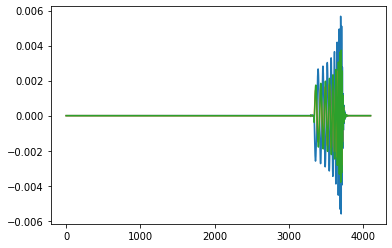

(152, 4096, 3)
0.0 0.010264401896369615


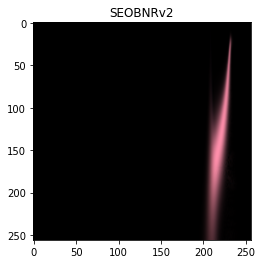

SEOBNRv4
(3, 1465)


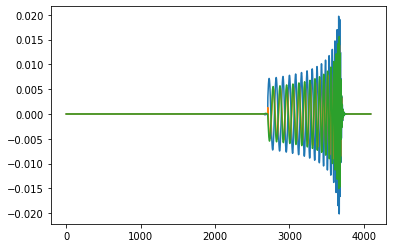

(152, 4096, 3)
0.0 0.03546466682733722


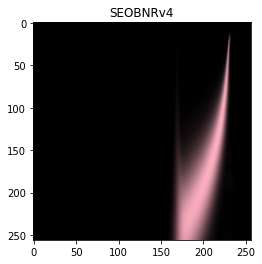

SEOBNRv4
(3, 995)


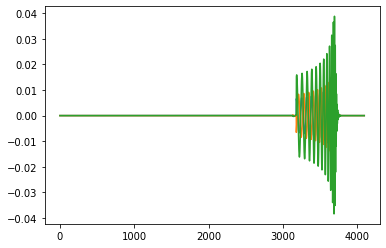

(152, 4096, 3)
0.0 0.06563788741630606


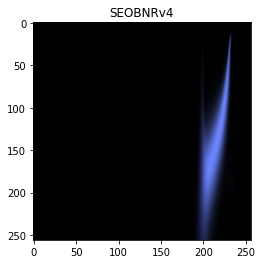

SEOBNRv4
(3, 3445)


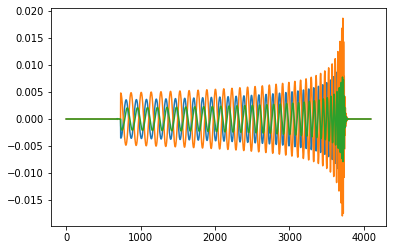

(152, 4096, 3)
0.0 0.030628690607501285


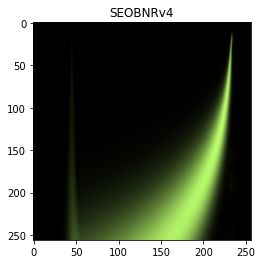

SEOBNRv2
(3, 1350)


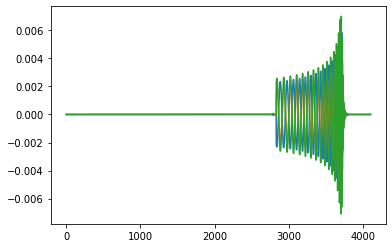

(152, 4096, 3)
0.0 0.012563422011488188


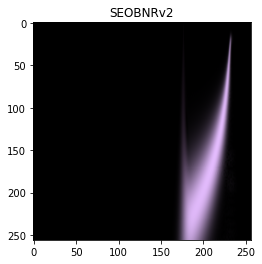

In [26]:
np.random.seed(1)

#Define the Detectors
det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')

for n in range(100):
    #Define the GW params
    gwapprox = np.random.choice( gwlist )
    print(gwapprox)
    hp, hc = get_td_waveform(approximant=gwapprox,
                             mass1=16 + np.random.randint(0,10),
                             mass2=16 + np.random.randint(0,10),
                             delta_t=1.0/4096,
                             spin1z=0.5 + np.random.rand()*0.5,
                             spin2z=0.25 + np.random.rand()*0.5,
                             inclination= 2 * np.pi * np.random.rand(),
                             coa_phase= 2 * np.pi * np.random.rand(),
                             phase_order = np.random.randint(2,8),
                             f_lower=np.random.randint(24,64),
                             distance=int(np.random.randint(1,1000)),
                            )

    
    # Choose a GPS end time, sky location, and polarization phase for the merger
    # NOTE: Right ascension and polarization phase runs from 0 to 2pi
    #       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
    end_time = 1192529720 + np.random.randint(1192529720//100000)
    declination = np.pi * np.random.rand() - np.pi/2
    right_ascension = 2 * np.pi * np.random.rand()
    polarization = 2 * np.pi * np.random.rand()
    hp.start_time += end_time
    hc.start_time += end_time

    signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
    signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
    signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)    
    minlen = np.min( [len(signal_h1), len(signal_l1), len(signal_v1)] )
    data = np.stack( (signal_h1[:minlen], signal_l1[:minlen], signal_v1[:minlen]),  ) * 1e19
    print(data.shape)
    
    if data.shape[1]>4096:
        data = data[:,data.shape[1]-4096:]
        for N in range(80):
            data[:,N] *= 1./(N+1)
    
    if len(hp)<4096:
        for N in range(80):
            data[:,N] *= 1./(N+1)
        data = np.pad(data, ((0,0),(4096-data.shape[1],0)) )
    
    
    plt.plot(data[0])
    plt.plot(data[1])
    plt.plot(data[2])
    plt.show()
    
    cwt, freqs = pywt.cwt(data, scales=np.arange(1, 95, 0.62), wavelet='cmor1.5-0.95', sampling_period=1/2048, method='fft')
    cwt = cwt.transpose(0,2,1)
    print(cwt.shape)
    cwt = np.log1p( np.abs(cwt) )
    print( cwt.min(), cwt.max())
    cwt -= cwt.min()
    cwt /= cwt.max()
    plt.imshow(cv2.resize(cwt,(256, 256)) )
    plt.title(gwapprox)
    plt.show()